# Python For Data Science, The Wrangler 2021
By Lucy X. Wang



## Other Resources
* [Python Data Science Handbook (Colab notebook) ](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb) - Exhaustive guide that leans more technical
* Cheat Sheets
  * [Pandas](http://datacamp-community-prod.s3.amazonaws.com/d4efb29b-f9c6-4f1c-8c98-6f568d88b48f)
  * [Matplotlib](http://datacamp-community-prod.s3.amazonaws.com/e1a8f39d-71ad-4d13-9a6b-618fe1b8c9e9)/[Seaborn](http://datacamp-community-prod.s3.amazonaws.com/263130e2-2c92-4348-a356-9ed9b5034247)
  * [Scikit-Learn](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)
* [Kaggle](https://www.kaggle.com/) - for free datasets

## Python Notebook Refresher

*   Refer to the Table of contents for better notebook navigation (first icon on the left panel) 
*  Double-click to edit a cell
*   Shift + Enter to run a cell 
*   While you're typing out code, look out for auto-completions and documentation hints




## Python Refresher

*   int: `1`
*   float: `0.5`
*   None: `None`
*   str: `"Hello World"`
*   bool: `True` or `False`
*   list: 
    * List items are ordered, changeable, and allow duplicate values.
    * ```python 
    my_list = ["peaches", "apples", "grapes"]
    my_list.append("oranges") # add to the list
    my_list[1:3] # return items 1 (zero-indexed) to 3 (exclusive of 3)
    my_list[1] = "bananas" # change the item in position 1 to "bananas"
    my_list.remove("oranges") # remove from the list
      ```
*   tuple:
    * Tuple items are ordered and unchangeable
    * `my_tuple = ("peaches", "apples", "grapes")`
*   set:
    * Set items are unordered, unchangeable (each item can't be changed, but you can add/remove whole items), and unindexed
    * `my_set = {"peaches", "apples", "apples", "grapes"}`
    * This will automatically de-dupe to `{"peaches", "apples", "grapes"}`
*   dict: 
    * Store data in key:value pairs. It is ordered (Python 3.7+), changeable, and does not allow duplicates.
    * ```python
    my_dict = {"peaches": 1, "apples": 27, "grapes": 60}
    my_dict["oranges"] = 50 # set a new key value pair
    my_dict["apples"] # get value for "apples" key, returning 27
    my_dict["bananas"] # this will error our since bananas key does not exist
    my_dict.get("bananas", 0) # this will return a default value of 0 if bananas key does not exist
    ```
*   Comparisons
  * ```python
    1 < 5 # returns True
    "apple" == "apples" # returns False
    "apple" != "apples" # returns True
    ```

| Operation     | Meaning |
| ----------- | ----------- |
| <      | strictly less than       |
| <=  | less than or equal        |
| >  | less than or equal        |
| >= | greater than or equal  |
| ==  | equal        |
| !=  | not equal      |
| is  | object identity    |
| is not | negated object identity      |





## Generating Insights with Pandas

### Intro to pandas
This part is adapted from https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb

[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data, and many ML frameworks support *pandas* data structures as inputs.
Although a comprehensive introduction to the *pandas* API would span many pages, the core concepts are fairly straightforward, and we'll present them below. For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

#### Basic Concepts

The following line imports the *pandas* API and prints the API version:

In [1]:
from __future__ import print_function

import pandas as pd
pd.__version__

'1.1.5'

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html).

One way to create a Series is to construct a Series object. For example:

In [2]:
pd.Series(['peaches', 'apples', 'grapes'])

0    peaches
1     apples
2     grapes
dtype: object

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [3]:
fruit_name = pd.Series(['peaches', 'apples', 'grapes'])
quantity = pd.Series([1, 27, 60])

pd.DataFrame({ 'Fruit Name': fruit_name, 'Quantity':quantity })

,Fruit Name,Quantity
0,peaches,1
1,apples,27
2,grapes,60


### Loading a dataset

But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with data about billionaires. Run the following cell to load the data:

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/wangler/python_for_data_science_2021/main/forbes_billionaires_geo.csv", sep=",")
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,geometry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True,POINT (-122.3300624 47.6038321)
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True,POINT (-97.74369950000001 30.2711286)
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False,POINT (2.3514616 48.8566969)
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True,POINT (-122.2264453 47.620548)
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True,POINT (-122.1598465 37.4443293)


### Getting basic stats

You can get quick summary statistics by running `.describe()` on your data frame

In [5]:
df.describe()

,NetWorth,Rank,Age,Children
count,2755.000000,2755.000000,2630.00000,1552.000000
mean,4.749220,1345.663521,63.26730,2.978093
std,9.615358,772.669811,13.47916,1.618569
min,1.000000,1.000000,18.00000,1.000000
25%,1.500000,680.000000,54.00000,2.000000
50%,2.300000,1362.000000,63.00000,3.000000
75%,4.200000,2035.000000,73.00000,4.000000
max,177.000000,2674.000000,99.00000,23.000000


Pandas dataframes and series all have a fundamental set of metric functions that you can call directly on the dataframe or series object. Some common metrics are

```
.sum()
.count()
.mean()
.median()
.mode()
.std()
```

In [6]:
df.mean() # Get the mean of every column (auto-detects which columns are numeric)

NetWorth        4.749220
Rank         1345.663521
Age            63.267300
Children        2.978093
Self_made       0.716113
dtype: float64

Let's compute some other stats that aren't covered here

In [7]:
df.shape # Get shape of the dataset (rows, cols)

(2755, 13)

In [8]:
df.mean()

NetWorth        4.749220
Rank         1345.663521
Age            63.267300
Children        2.978093
Self_made       0.716113
dtype: float64

To do something with a specific column, index the column using brackets, like a dictionary. This returns just that column in the form of a `pd.Series` which is an n x 1 dimensional array.  

In [9]:
df["Status"].unique() # get all unique values for Status

array(['In Relationship', 'Married', 'Divorced', 'Widowed, Remarried',
       nan, 'Widowed', 'Single', 'Separated', 'Engaged'], dtype=object)

In [10]:
df["Source"].nunique() # get the number of unique values for Source (of wealth)

924

To do something with multiple select columns, you index via a list of column names (so you have 2 pairs of square brackets)

In [11]:
df[["Age", "NetWorth"]].mean() # get the mean age and net worth

Age         63.26730
NetWorth     4.74922
dtype: float64

#### Exercise
What is the number of unique countries in this dataset?

In [12]:
# Your code here

##### Solution

In [13]:
df["Country"].nunique()

70

### Slicing and Dicing

#### Slicing by row or column indices
You might want to slice the data by row index. When inspecting the dataframe, Python notebook cells automatically hide most of the rows in the middle. So let's peep at some of the middle rows.

In [14]:
df.iloc[500:505] # index by row number

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,geometry
500,Kwee brothers,5.6,Singapore,Real Estate,496,NaN,"Singapore, Singapore",Singapore,NaN,NaN,NaN,False,POINT (103.8194992 1.357107)
501,Clive Calder,5.5,United Kingdom,record label,502,74.0,"Grand Cayman, Cayman Islands",United Kingdom,Married,2.0,NaN,True,POINT (-81.17122910000001 19.3298691)
502,Hasmukh Chudgar & family,5.5,India,pharmaceuticals,502,87.0,"Ahmedabad, India",India,Married,3.0,NaN,True,POINT (72.5797068 23.0216238)
503,Dagmar Dolby & family,5.5,United States,Dolby Laboratories,502,79.0,"San Francisco, California",United States,Widowed,2.0,"Bachelor of Arts/Science, Heidelberg University",False,POINT (-122.419906 37.7790262)
504,Dong Wei,5.5,China,pharmaceuticals,502,50.0,"Lianyungang, China",China,NaN,NaN,NaN,True,POINT (119.215813 34.5978596)


In [15]:
df.iloc[500:505, :3] # index by row and column number

,Name,NetWorth,Country
500,Kwee brothers,5.6,Singapore
501,Clive Calder,5.5,United Kingdom
502,Hasmukh Chudgar & family,5.5,India
503,Dagmar Dolby & family,5.5,United States
504,Dong Wei,5.5,China


#### Slicing by boolean conditions
Now you may want to filter the data by specific criteria. Let's filter to only billionaires who are divorced, and return only their names. Again, you use square brackets for indexing. But this time, instead of indexing with a number, or column key name, you're using boolean conditions.


This is what the boolean condition looks like by itself. It creates a new series of boolean values

In [16]:
df["Status"] == "Divorced"

0       False
1       False
2       False
3        True
4       False
        ...  
2750    False
2751    False
2752    False
2753    False
2754    False
Name: Status, Length: 2755, dtype: bool

When you pass this boolean series as indices for the original dataframe, all values that evaluate to False will be removed from the result. So in this case, we're filtering out people who don't meet the condition of "Status" == "Divorced".

We'd also like to return only the Name column. So we index that at the end.

In [17]:
df[df["Status"] == "Divorced"]["Name"]

3                   Bill Gates
16                Alice Walton
32      David Thomson & family
46                Lee Shau Kee
47             Jacqueline Mars
                 ...          
2600          Martha MacMillan
2657        George Yancopoulos
2670                Zhou Yahui
2689       Clelia Haji-Ioannou
2720            Maria Pinheiro
Name: Name, Length: 144, dtype: object

Filter for billionaires who are divorced AND whose citizenship is USA, and return their names. When you start having multiple filtering conditions, you need to separate them with parentheses.

In [18]:
df[(df["Status"] == "Divorced") & (df["Citizenship"] == "United States")]["Name"]

3               Bill Gates
16            Alice Walton
47         Jacqueline Mars
64         Thomas Peterffy
119            Ken Griffin
               ...        
2491          Laurie Tisch
2540             Ron Corio
2543           Henry Davis
2600      Martha MacMillan
2657    George Yancopoulos
Name: Name, Length: 62, dtype: object

You can also filter by other match conditions, aside from just equality

Here we return the names and ages of all billionaires who are younger than 40 and reside in California.

In [19]:
df[(df["Age"] < 40) & (df["Residence"].str.contains("California"))][["Name", "Age"]]

,Name,Age
4,Mark Zuckerberg,36.0
106,Dustin Moskovitz,36.0
153,Brian Chesky,39.0
176,Nathan Blecharczyk,37.0
178,Joe Gebbia,39.0
184,Bobby Murphy,32.0
198,Evan Spiegel,30.0
403,Brian Armstrong,38.0
768,Ben Silbermann,38.0
850,Lynsi Snyder,39.0


What is the median net worth of billionaires who are under 40 and live in California?

In [20]:
df[(df["Age"] < 40) & (df["Residence"].str.contains("California"))]["NetWorth"].median() # Partial string match for California

3.2

#### Exercise
What is the average age of billionaires named John?

In [21]:
# Your code here

##### Solution

In [22]:
df[df["Name"].str.contains("John")]["Age"].mean()

68.07142857142857

### Data Transformations

To get a better sense of the _scale_ of their net worth, let's calculate that in dollar amounts.

In [23]:
df["NetWorth"] * 10**9 # Represents 10^9, or 1 billion

0       1.770000e+11
1       1.510000e+11
2       1.500000e+11
3       1.240000e+11
4       9.700000e+10
            ...     
2750    1.000000e+09
2751    1.000000e+09
2752    1.000000e+09
2753    1.000000e+09
2754    1.000000e+09
Name: NetWorth, Length: 2755, dtype: float64

This doesn't actually save the transformed values anywhere. If we want to save that as a new column, we have to assign it explicitly:

In [24]:
df["NetWorthDollars"] = df["NetWorth"] * 10**9
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,geometry,NetWorthDollars
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True,POINT (-122.3300624 47.6038321),1.770000e+11
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True,POINT (-97.74369950000001 30.2711286),1.510000e+11
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False,POINT (2.3514616 48.8566969),1.500000e+11
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True,POINT (-122.2264453 47.620548),1.240000e+11
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True,POINT (-122.1598465 37.4443293),9.700000e+10


Let's drop that new column, as we no longer need it. As with most Pandas operations, any transformations you apply need to be saved to the data frame if you want to preserve them. 

In [25]:
df = df.drop(columns=["NetWorthDollars"])

We can create new columns derived from other columns. This generates a boolean column that designates whether the person's relationship status matches any of the given values.

In [26]:
df["on_the_market"] = df["Status"].isin(["Single", "Divorced"])

Let's derive a boolean column for whether the person is a school dropout. This will require a bit of string parsing.

In [27]:
# Use Pandas' string functions, accessible through `.str`
# First, make the whole Education field lower case so that our search is case-insensitive.
# Then search for the words "drop out"
# For more sophisticated string matching and extracting, use regex
df["is_drop_out"] = df["Education"].str.lower().str.contains("drop out")

In [28]:
df.head(5)

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,geometry,on_the_market,is_drop_out
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True,POINT (-122.3300624 47.6038321),False,False
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True,POINT (-97.74369950000001 30.2711286),False,False
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False,POINT (2.3514616 48.8566969),False,False
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True,POINT (-122.2264453 47.620548),True,True
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True,POINT (-122.1598465 37.4443293),False,True


#### Exercise


Create a new column called "has_bachelor" that indicates of the person has a Bachelor's degree.

In [29]:
# Your code here

##### Solution

In [62]:
df["has_bachelor"] = df["Education"].str.lower().str.contains("bachelor")
df["has_bachelor"]

0        True
1        True
2        True
3       False
4       False
        ...  
2750      NaN
2751      NaN
2752      NaN
2753      NaN
2754      NaN
Name: has_bachelor, Length: 2755, dtype: object

### Aggregation and Grouping

We have already used basic aggregation functions on the whole dataset.

In [30]:
df["NetWorth"].max() # get the maximum Net Worth value in the whole dataset

177.0

We can pull more insights from the data by grouping on specific values.

Using `.value_counts()` is an easy way to group and aggregate.

In [31]:
df["Education"].value_counts() # group by Education and count all instances

Diploma, High School                                                                               23
Bachelor of Arts/Science, Stanford University                                                      13
Bachelor of Arts/Science, Harvard University                                                       11
Bachelor of Arts/Science, University of Southern California                                         9
Bachelor of Arts/Science, Yale University                                                           8
                                                                                                   ..
Bachelor of Arts/Economics, London School of Economics & Political Science                          1
Bachelor of Arts/Science, Babson College; Master of Business Administration, Harvard University     1
Liaoning University                                                                                 1
Bachelor of Arts/Science, Bandung Institute of Technology                         

Using `.groupby()` let's us do more custom aggregations.

For example, let's count the number of billionaires for _each country_. Let's also sort by highest NetWorth on top.


In [32]:
df.groupby(["Country"])[["Name"]].count().sort_values("Name", ascending=False).head(10) # sorting defaults to ascending order unless this argument is given

,Name
Country,
United States,724
China,626
India,140
Germany,136
Russia,118
Hong Kong,71
Brazil,65
Canada,64
United Kingdom,56


You can group on multiple columns too

In [33]:
df.groupby(["Country", "Status"])[["NetWorth"]].mean()

NetWorth
Country       Status                       
Algeria       Married              4.800000
Argentina     Married              2.633333
              Single               1.300000
Australia     Divorced             2.000000
              Married              3.906452
...                                     ...
United States Widowed              6.568571
              Widowed, Remarried  23.050000
Venezuela     Married              3.200000
Vietnam       Married              2.783333
Zimbabwe      Married              1.500000

[171 rows x 1 columns]

Using `.agg()` gives you more flexibility on choice of aggregate function and lets you assign different aggregation functions to different columns at the same time. It also lets you rename the new aggregation column e.g. "mean_net_worth"

Not required, but resetting the index lets you pop the group keys (Country, Status) back into the data frame as columns. This could make things more convenient in some cases.

In [34]:
df.groupby(["Country", "Status"]).agg(
                                      mean_net_worth=("NetWorth", "mean"), 
                                      total_count=("Name", "count")
                                      ).reset_index()

,Country,Status,mean_net_worth,total_count
0,Algeria,Married,4.800000,1
1,Argentina,Married,2.633333,3
2,Argentina,Single,1.300000,1
3,Australia,Divorced,2.000000,5
4,Australia,Married,3.906452,31
...,...,...,...,...
166,United States,Widowed,6.568571,35
167,United States,"Widowed, Remarried",23.050000,6
168,Venezuela,Married,3.200000,1
169,Vietnam,Married,2.783333,6


#### Exercise

What's the median age of billionaires per Country, sorted by decreasing median age?

In [35]:
# Your code here

##### Solution

In [36]:
# Alternate solution 
# df.groupby("Country")[["Age"]].median().sort_values("Age", ascending=False).head(10)

df.groupby(["Country"]).agg(mean_age=("Age", "median")).reset_index().sort_values("mean_age", ascending=False).head(10)

,Country,mean_age
14,Eswatini (Swaziland),89.0
1,Argentina,86.5
43,Oman,82.0
9,Colombia,82.0
56,St. Kitts and Nevis,81.0
0,Algeria,77.0
44,Peru,75.0
36,Monaco,75.0
37,Morocco,74.0
3,Austria,73.5


### Combining Datasets

Let's join in other datasets to get more insights.

This is a country population dataset.

In [37]:
pop_df = pd.read_csv("https://raw.githubusercontent.com/wangler/python_for_data_science_2021/main/population_by_country_2020.csv", sep=",")
pop_df.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


Let's calculate number of billionaires per capita for each country

In [38]:
# Define a new df with billionaire counts per country
# Resetting the index here so we can retain the "Country" column here
billionaires_per_country = df.groupby("Country").agg(num_billionaires=("Name", "count")).reset_index()

In [39]:
# Define a new df with populations per country
pop_per_country = pop_df[["Country (or dependency)", "Population (2020)"]]

In [40]:
# Join the datasets on Country
merged = pd.merge(billionaires_per_country, pop_per_country, left_on="Country", right_on="Country (or dependency)")

In [41]:
# Return only columns of interest, removing redundant columns
merged = merged[["Country", "num_billionaires", "Population (2020)"]]

In [42]:
# Create a new column for billionaires_per_capita
merged["billionaires_per_capita"] = merged["num_billionaires"] / merged["Population (2020)"]

In [43]:
merged.sort_values("billionaires_per_capita", ascending=False).head(10)

,Country,num_billionaires,Population (2020),billionaires_per_capita
33,Monaco,3,39290,0.000076
29,Liechtenstein,1,38147,0.000026
18,Hong Kong,71,7507523,0.000009
20,Iceland,2,341628,0.000006
54,Switzerland,40,8665615,0.000005
48,Singapore,27,5858322,0.000005
10,Cyprus,5,1208886,0.000004
53,Sweden,41,10110233,0.000004
24,Israel,25,8678517,0.000003
39,Norway,12,5428594,0.000002


## Plotting Charts

You can plot directly from the pandas dataframe object using `.plot()`. The plotting capabilities in pandas make use of matplotlib. For most plots, it's easier to just use pandas' high-level plotting functions built into the dataframe. Use matplotlib if your plot needs to be highly specialized and customized. 



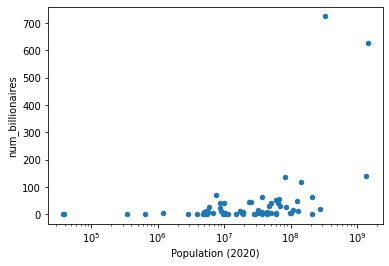

In [44]:
merged.plot(x="Population (2020)", 
            y="num_billionaires", 
            kind="scatter", logx=True)

Other types of plots can be generated with the below values for the `kind` argument



> ‘line’ : line plot (default)
<br> ‘bar’ : vertical bar plot
<br> ‘barh’ : horizontal bar plot
<br>‘hist’ : histogram
<br>‘box’ : boxplot
<br>‘kde’ : Kernel Density Estimation plot
<br>‘density’ : same as ‘kde’
<br>‘area’ : area plot
<br>‘pie’ : pie plot
<br>‘scatter’ : scatter plot (DataFrame only)
<br>‘hexbin’ : hexbin plot (DataFrame only)


Let's look at the original dataframe again

In [45]:
df.head(5)

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,geometry,on_the_market,is_drop_out
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True,POINT (-122.3300624 47.6038321),False,False
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True,POINT (-97.74369950000001 30.2711286),False,False
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False,POINT (2.3514616 48.8566969),False,False
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True,POINT (-122.2264453 47.620548),True,True
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True,POINT (-122.1598465 37.4443293),False,True


We can plot a histogram of net worth (there are multiple ways to do it through pandas)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b00d0ba10>]],
      dtype=object)

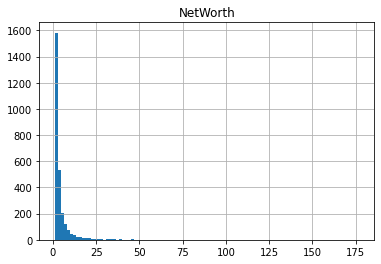

In [46]:
df.hist("NetWorth", bins=100)

# Option 2
# df["NetWorth"].hist(bins=100)

# Option 3
# df["NetWorth"].plot(kind="hist", bins=100)

#### Making pretty plots with Seaborn
Seaborn is another high-level interface for matplotlib. While you can customize your plots in matplotlib any way that you want, Seaborn's default settings are already very pretty.

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

The difference here is only subtle, but the dots have a bit more visual depth to them.

[None]

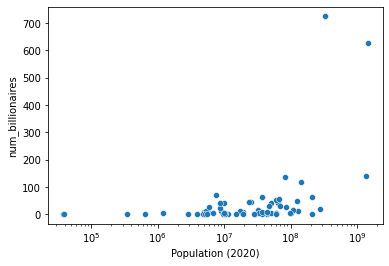

In [48]:
sns.scatterplot(
    x=merged["Population (2020)"], y=merged["num_billionaires"]
    ).set(xscale="log")

Let's plot the top countries with the most billionaires.

In [49]:
merged_top_20 = merged.sort_values("num_billionaires", ascending=False).head(20)

This is one way to do it with pandas (using default parameters):

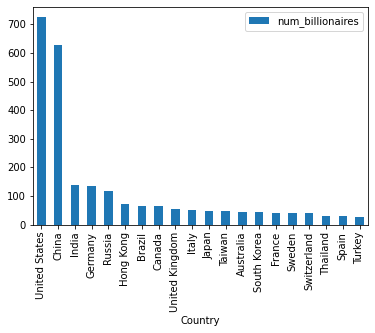

In [50]:
merged_top_20.plot.bar(x="Country", y="num_billionaires")

And this is the equivalent in Seaborn (using default parameters):

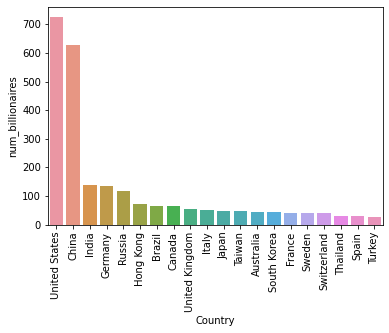

In [51]:
sns.barplot(data=merged_top_20, x="Country", y="num_billionaires")
plt.xticks(rotation=90)
plt.show()

Let's put together a simple boxplot. (Boxplots represent the quartiles of a distribution, along with outliers).

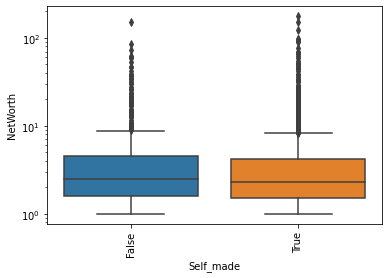

In [52]:
sns.boxplot(data=df, x="Self_made", y="NetWorth").set(yscale="log")
plt.xticks(rotation=90)
plt.show()

##### Exercise
Plot the relationship between number of children and Net Worth


In [53]:
# Your code here

###### Solution

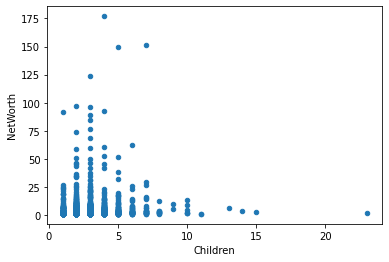

In [54]:
df.plot(x="Children", y="NetWorth", kind="scatter")

# Alternate Solution
# df.plot.scatter(x="Children", y="NetWorth")

## Going Deeper with Modeling

Let's train a linear regression model to predict Net Worth, to get a sense of how well any of these columns can predict it.

Prep the training data. Only select numeric and boolean columns for today. (Categorical features take a bit more prep).

In [56]:
from sklearn.model_selection import train_test_split

X_keys = ["Age", "Children", "is_drop_out", "Self_made"]
y_key = "NetWorth"

# Replace missing numeric values with 0. Otherwise, the model training fails.
X = df[X_keys].fillna(0)
y = df[y_key]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1653, 4)
(1102, 4)
(1653,)
(1102,)


Fit a Linear Regression model from Scikit-learn. Scikit-learn (or sklearn) offers a wide variety of machine learning models and tools that you can use.

In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The fitted model intercept is the mean Net Worth

In [58]:
# print the intercept
print(model.intercept_)

4.185671918729044


The fitted coefficient represents the multiplier on the column value. When you sum the product of the coefficient * column value, across all columns, you get the final predicted value for NetWorth.

e.g. So if the coefficient for Children is 5, then for each child a person has, you add 5 billion to their NetWorth.

In [59]:
coeff_parameter = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_parameter

,Coefficient
Age,0.000110
Children,0.535634
is_drop_out,5.178991
Self_made,-0.773451


To get more rigorous statistics on your linear model, you can use the `statsmodels` library, which train the linear model and also print a comprehensive summary of your fitted coefficients.

In [60]:
import statsmodels.api as sm

# Statsmodels requires that the input variables are all numeric. (Sklearn is more flexible about that).
# So we need to convert the boolean features to integers.
X_train["is_drop_out"] = X_train["is_drop_out"].astype(int)
X_train["Self_made"] = X_train["Self_made"].astype(int)

# Set up the model
X_train_sm = sm.add_constant(X_train)
least_squares_model = sm.OLS(y_train ,X_train_sm).fit()

print(least_squares_model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:               NetWorth   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     9.724
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           8.97e-08
Time:                        19:31:33   Log-Likelihood:                -6090.2
No. Observations:                1653   AIC:                         1.219e+04
Df Residuals:                    1648   BIC:                         1.222e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.1857      0.897      4.668      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Overall the R-squared is really bad, as it's only 0.023. So this model alone is not a great predictor of NetWorth. 